  Lab 2: 양자 측정 3단계 시나리오
  theta = 0.7854 rad  |  shots = 1024

[단계 1] probs -- 측정 전, 확률로 존재한다
  P(|0>) = 0.8477   이론: cos^2(theta/2) = 0.8536
  P(|1>) = 0.1523   이론: sin^2(theta/2) = 0.1464


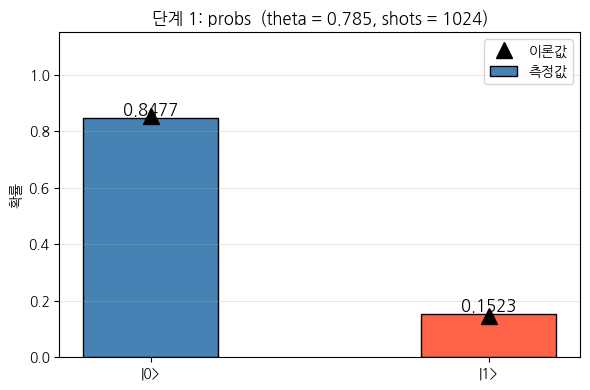


[단계 2] sample -- 측정 순간, 고전값으로 collapse
  +1(|0>) 횟수: 872   비율: 0.8516   probs P(|0>): 0.8477
  -1(|1>) 횟수: 152   비율: 0.1484   probs P(|1>): 0.1523


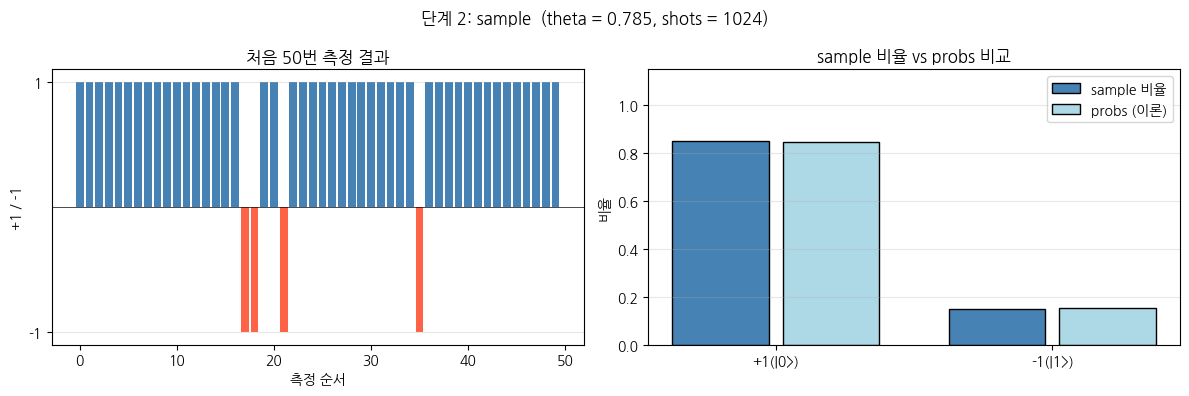


[단계 3] expval -- 검증, 회로 결과 = 수식
  expval(Z)       = 0.699219
  이론 cos(theta) = 0.707107
  차이             = 0.007888


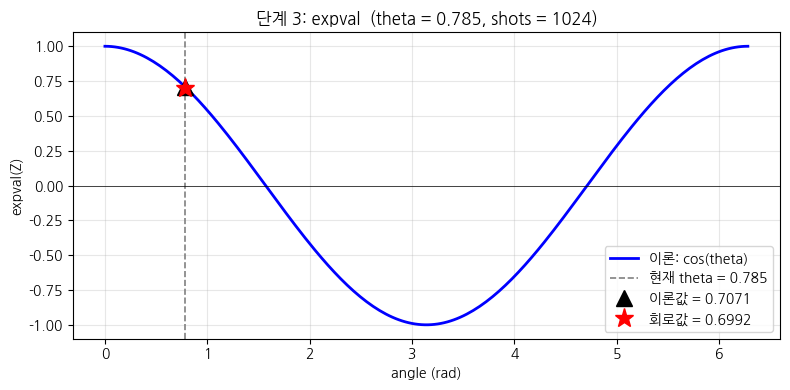


  Lab 2 완료!
  theta 또는 shots 값을 바꿔서 다시 실행해보세요.


In [3]:
# !pip install pennylane koreanize_matplotlib -q
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
plt.rcParams['axes.unicode_minus'] = False

# ============================================================
# ===== 학생 수정 영역 =====
theta = np.pi / 4
# 추천값과 관찰 포인트:
# pi/6  -> P(|0>) 매우 높음, 거의 |0> 상태
# pi/4  -> 중간 중첩, expval = 0.707
# pi/2  -> 완전 중첩, P(|0>)=P(|1>)=0.5, expval = 0
# pi    -> 완전히 |1> 상태, expval = -1

shots = 1024
# 추천값과 관찰 포인트:
# 10    -> 결과 불안정, probs와 큰 차이
# 100   -> 어느 정도 수렴
# 1024  -> 기본값, 안정적
# 10000 -> 이론값에 거의 일치
# ===== 수정 끝 =====
# ============================================================

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def circuit_probs(angle):
    qml.RX(angle, wires=0)
    return qml.probs(wires=0)

@qml.qnode(dev)
def circuit_sample(angle):
    qml.RX(angle, wires=0)
    return qml.sample(qml.PauliZ(0))

@qml.qnode(dev)
def circuit_expval(angle):
    qml.RX(angle, wires=0)
    return qml.expval(qml.PauliZ(0))

# 0.44.0 권장 방식: set_shots transform
circuit_probs_s  = qml.set_shots(circuit_probs,  shots=shots)
circuit_sample_s = qml.set_shots(circuit_sample, shots=shots)
circuit_expval_s = qml.set_shots(circuit_expval, shots=shots)

print("=" * 55)
print("  Lab 2: 양자 측정 3단계 시나리오")
print("=" * 55)
print(f"  theta = {theta:.4f} rad  |  shots = {shots}")

# ============================================================
# 단계 1: probs -- 측정 전, 확률로 존재한다
# ============================================================
print("\n[단계 1] probs -- 측정 전, 확률로 존재한다")

p = circuit_probs_s(theta)
p0_theory = np.cos(theta / 2) ** 2
p1_theory = np.sin(theta / 2) ** 2

print(f"  P(|0>) = {p[0]:.4f}   이론: cos^2(theta/2) = {p0_theory:.4f}")
print(f"  P(|1>) = {p[1]:.4f}   이론: sin^2(theta/2) = {p1_theory:.4f}")

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(['|0>', '|1>'], p, color=['steelblue', 'tomato'],
              edgecolor='black', width=0.4, label='측정값')
ax.plot(['|0>', '|1>'], [p0_theory, p1_theory],
        'k^', ms=12, zorder=5, label='이론값')
for bar, val in zip(bars, p):
    ax.text(bar.get_x() + bar.get_width()/2, val + 0.01,
            f'{val:.4f}', ha='center', fontsize=12)
ax.set_ylim(0, 1.15)
ax.set_title(f"단계 1: probs  (theta = {theta:.3f}, shots = {shots})", fontsize=12)
ax.set_ylabel("확률"); ax.legend(); ax.grid(axis='y', alpha=0.3)
plt.tight_layout(); plt.show()

# ============================================================
# 단계 2: sample -- 측정 순간, 고전값으로 collapse
# ============================================================
print("\n[단계 2] sample -- 측정 순간, 고전값으로 collapse")

samples = circuit_sample_s(theta)
cnt_p1   = int(np.sum(samples == 1))
cnt_m1   = int(np.sum(samples == -1))
ratio_p1 = cnt_p1 / shots

print(f"  +1(|0>) 횟수: {cnt_p1}   비율: {ratio_p1:.4f}   probs P(|0>): {p[0]:.4f}")
print(f"  -1(|1>) 횟수: {cnt_m1}   비율: {cnt_m1/shots:.4f}   probs P(|1>): {p[1]:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle(f"단계 2: sample  (theta = {theta:.3f}, shots = {shots})", fontsize=12)

ax = axes[0]
display = samples[:50]
colors  = ['steelblue' if v == 1 else 'tomato' for v in display]
ax.bar(range(len(display)), display, color=colors, edgecolor='none', width=0.8)
ax.axhline(0, color='black', lw=0.5)
ax.set_title("처음 50번 측정 결과")
ax.set_xlabel("측정 순서"); ax.set_ylabel("+1 / -1")
ax.set_yticks([1, -1]); ax.grid(axis='y', alpha=0.3)

ax = axes[1]
x = np.arange(2)
ax.bar(x - 0.2, [ratio_p1, cnt_m1/shots], 0.35,
       color='steelblue', edgecolor='black', label='sample 비율')
ax.bar(x + 0.2, [p[0], p[1]], 0.35,
       color='lightblue', edgecolor='black', label='probs (이론)')
ax.set_xticks(x); ax.set_xticklabels(['+1(|0>)', '-1(|1>)'])
ax.set_ylim(0, 1.15); ax.set_title("sample 비율 vs probs 비교")
ax.set_ylabel("비율"); ax.legend(); ax.grid(axis='y', alpha=0.3)
plt.tight_layout(); plt.show()

# ============================================================
# 단계 3: expval -- 검증, 회로 결과 = 수식
# ============================================================
print("\n[단계 3] expval -- 검증, 회로 결과 = 수식")

ev        = float(circuit_expval_s(theta))
ev_theory = np.cos(theta)

print(f"  expval(Z)       = {ev:.6f}")
print(f"  이론 cos(theta) = {ev_theory:.6f}")
print(f"  차이             = {abs(ev - ev_theory):.6f}")

angles = np.linspace(0, 2 * np.pi, 200)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(angles, np.cos(angles), 'b-', lw=2, label='이론: cos(theta)')
ax.axvline(theta, color='gray', linestyle='--', lw=1.2, label=f'현재 theta = {theta:.3f}')
ax.plot(theta, ev_theory, 'k^', ms=12, zorder=5, label=f'이론값 = {ev_theory:.4f}')
ax.plot(theta, ev,        'r*', ms=14, zorder=5, label=f'회로값 = {ev:.4f}')
ax.axhline(0, color='black', lw=0.5)
ax.set_title(f"단계 3: expval  (theta = {theta:.3f}, shots = {shots})", fontsize=12)
ax.set_xlabel("angle (rad)"); ax.set_ylabel("expval(Z)")
ax.legend(); ax.grid(alpha=0.3)
plt.tight_layout(); plt.show()

print("\n" + "=" * 55)
print("  Lab 2 완료!")
print("  theta 또는 shots 값을 바꿔서 다시 실행해보세요.")
print("=" * 55)